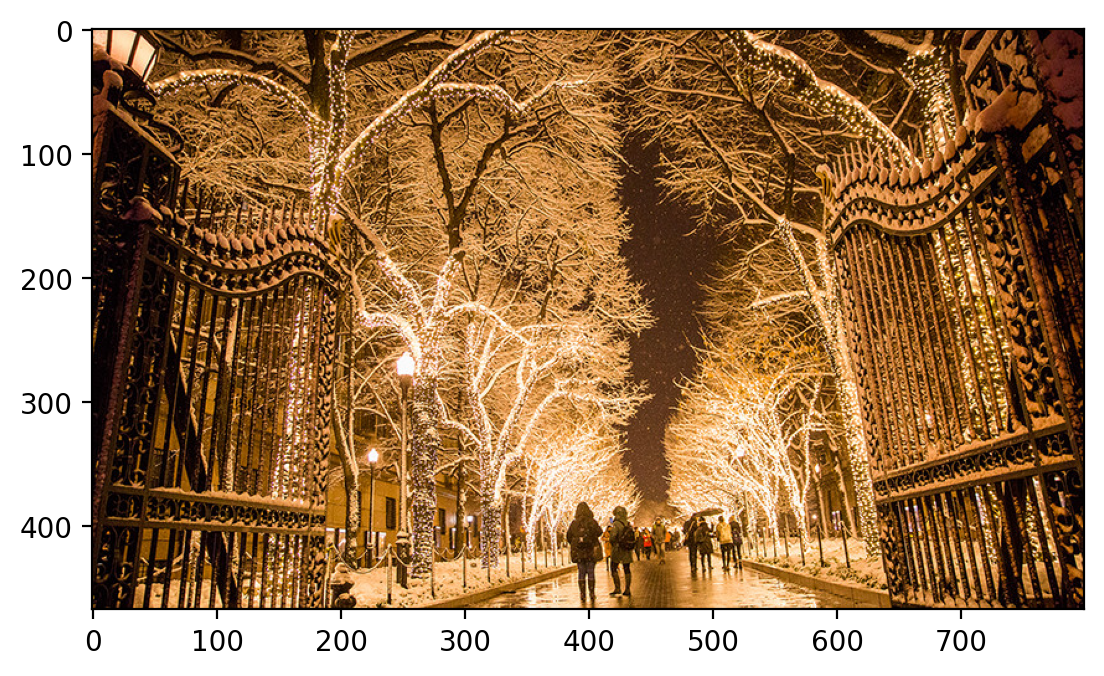

In [2]:
#Author: Jorge Galvis 

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math


# this makes image look better on a macbook pro
def imageshow(img, dpi=200):
    if dpi > 0:
        F = plt.gcf()
        F.set_dpi(dpi)
    plt.imshow(img)

    
def rgb_ints_example():
    '''produces a red,purple,green squares
    on the diagonal, over a black background'''
    # RGB indexes
    red,green,blue = range(3)
    # img array 
    # all zeros = black pixels
    # shape: (150 rows, 150 cols, 3 colors) 
    img = np.zeros((150,150,3), dtype=np.uint8)
    for x in range(50):
        for y in range(50):
            # red pixels
            img[x,y,red] = 255
            # purple pixels
            # set all 3 color components
            img[x+50,y+50,:] = (128, 0, 128)
            # green pixels
            img[x+100,y+100,green] = 255
    return img


def onechannel(pattern, rgb):
    '''This function returns a new pattern 
    that contains only red, blue, or gree'''
    # 0 removes the color 
    # the intensity of the color ranges from 0-255 accordingly
    # because it is represented in an unsigned 8bits integer
    img = np.copy(pattern)
    if rgb == 0:
        #removes the green and blue components
        img[:,:,1:] = 0
    elif rgb == 1:
        #removes the red and blue components
        img[:,:,[0,2]] = 0
    elif rgb == 2:
        #removes the red and green components
        img[:,:,[0,1]]= 0
    return img 


def permutecolorchannels(img, perm):
    '''This function permutates the color of
    an image'''
    img_copy = np.copy(img)
    img_copy = img_copy[:,:,perm]
    return img_copy

def decrypt_image(secret, key):
    '''This function decryptes the hidden image'''
    img = np.copy(secret)
    #img.shape[0] gives the number of rows
    for i in range(img.shape[0]):
        img[i, :, 0] ^= key
        img[i, :, 1] ^= key
        img[i, :, 2] ^= key
    return img

plt.imshow(rgb_ints_example())

pattern = plt.imread('pattern.png')
plt.imshow(onechannel(pattern, 2))

plt.imshow(permutecolorchannels(pattern, [1,2,0]))

permcolors = plt.imread('permcolors.jpg')
imageshow(permcolors)
plt.imshow(permutecolorchannels(permcolors, [2,0,1]))

secret = plt.imread('secret.bmp')
plt.imshow(secret)
key = np.load('key.npy')
plt.imshow(decrypt_image(secret, key))